# Projekt ML.

Do analizy przyjęto dane ze zbiotu 'cars.csv'

Zestawy danych przygotowano w części "Projekt ML, przygotowanie danych"

## Cel analizy: Od czego zależy bardziej ekonomiczne zużycie paliwa? Czy da się przewidzieć zużycie paliwa na podstawie danych ze zbioru?

Uczenie maszynowe będzie wykorzystywać regresję.

Dane do przetwarzania przygotowano z zamiarem pokazania wpływu jakości danych na efekty uczenia maszynowego.

Przygotowane zbiory danych:

Zbiór 1. Dane kategoryczne zostaną potraktowane jako liczbowe, kolumna 'names' nie bierze udziału w ML

Zbiór 2. Dane kategoryczne 'origin' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' nie bierze udziału w ML

Zbiór 3. Dane kategoryczne 'origin' i 'displacement' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' nie bierze udziału w ML

Zbiór 4. Dane kategoryczne 'origin' i 'displacement' rozdzielone (dummies), reszta danych jako dane liczbowe, kolumna 'names' zostaje rozpisana na słownik i bierze udział w ML  (taka namiastka LLM, to jest dobry moment na uśmiech)

Zbiór 5. Do danych kategorycznych 'origin' (Zbiór 2) zostają dodane dodatkowe 4 cechy (features)

Zbiór 6. Dane pierwotne wstępnie opracowane statystycznie

Zbiór 7. Dane pierwotne wstępnie opracowane statystycznie z usunięciem wartości odstających (outliers)

Zbiór 8. Dane pierwotne wstępnie opracowane statystycznie z zastosowaniem transformacji logarytmicznych - rozkłady bardziej zbliżone do normalnego

# Uczenie maszynowe z wykorzystaniem algorytmu sklearn LinearRegression

W celu pokazania jak radzą sobie inne algorytmy ML pokazano parametry uczenia dla KNeighborsRegressor, RandomForestRegressor oraz xgboost. Chodzi o pokazanie punktu odniesienia.


Hiperparametry algorytmów uczenia maszynowego nie są optymalizowane, przyjęto wartiości "przyzwoite"

Ocena uczenia realizowana jest metodą .score()

In [53]:
# import potrzebnych bibliotek
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg


In [54]:
# wyłączenie komunikatów warnings dla większej czytelności
# w tym przypadku poniższy kod generuje ostrzeżenia dla xgboost
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [55]:
# przygotowanie zestawienia zbiorów
data_file_names = [ 'cars_4_ML_no_dummy_cleared.csv', 'cars_4_ML_dummy_origin_cleared.csv',
              'cars_4_ML_dummy_all_cleared.csv', 'cars_4_ML_dummy_all_LLM_cleared.csv', 'cars_4_ML_dummy_origin_cleared_features.csv',
              'cars_preprocessed.csv', 'cars_clean_final.csv', 'cars_log_only.csv']
data_names = [ 'num', 'num_cat_origin', 'num_cat_all', 'num_cat_all_LLM', 'num_cat_origin_features',
              'preprocessed', 'clean_final',  'log_only']

In [56]:
# przygotowanie zestawienia modeli
model_lin = LinearRegression()
model_knn = KNeighborsRegressor(n_neighbors=5)
model_rf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
model_xgb = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 0)

models = [ model_lin, model_knn, model_rf, model_xgb ]
models_names = [ 'model_lin', 'model_knn', 'model_rf', 'model_xgb' ]

In [57]:
results = pd.DataFrame(columns= ['data_name', 'model_name', 'score_train', 'score_test', 'model'])
for data in data_names:
    #print(data)
    df = pd.read_csv(data_file_names[data_names.index(data)])
    X_no_scaler = df.drop(columns=['name', 'mpg']).values
    scaler_x = StandardScaler()
    X = scaler_x.fit_transform(X_no_scaler)
    y_no_scaler = df['mpg'].values.reshape((-1,1))
    scaler_y = StandardScaler()
    y = scaler_y.fit_transform(y_no_scaler).reshape((-1,))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    for model in models:
        model_name = models_names[models.index(model)]
        model.fit(X_train, y_train)
        
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)

        index = len(results)
        results.loc[index,'data_name'] = data
        results.loc[index,'model_name'] = model_name
        results.loc[index,'score_train'] = score_train
        results.loc[index,'score_test'] = score_test
        results.loc[index,'model'] = model
        
        
    
print(results.iloc[:,:4])

                  data_name model_name score_train score_test
0                       num  model_lin    0.832622   0.828823
1                       num  model_knn     0.89511   0.870602
2                       num   model_rf    0.980802   0.909116
3                       num  model_xgb    0.999989   0.908028
4            num_cat_origin  model_lin    0.876747   0.848826
5            num_cat_origin  model_knn    0.927059   0.893803
6            num_cat_origin   model_rf      0.9869   0.918743
7            num_cat_origin  model_xgb    0.999992   0.908184
8               num_cat_all  model_lin    0.886706   0.820164
9               num_cat_all  model_knn    0.929549    0.85214
10              num_cat_all   model_rf    0.986673   0.893801
11              num_cat_all  model_xgb    0.999994   0.893935
12          num_cat_all_LLM  model_lin    0.982354   0.772834
13          num_cat_all_LLM  model_knn    0.793263   0.669914
14          num_cat_all_LLM   model_rf    0.987511   0.892282
15      

In [58]:
# wyniki dla danych
for data in data_names:
    print(results.iloc[:,:4][ results['data_name']==data] )

  data_name model_name score_train score_test
0       num  model_lin    0.832622   0.828823
1       num  model_knn     0.89511   0.870602
2       num   model_rf    0.980802   0.909116
3       num  model_xgb    0.999989   0.908028
        data_name model_name score_train score_test
4  num_cat_origin  model_lin    0.876747   0.848826
5  num_cat_origin  model_knn    0.927059   0.893803
6  num_cat_origin   model_rf      0.9869   0.918743
7  num_cat_origin  model_xgb    0.999992   0.908184
      data_name model_name score_train score_test
8   num_cat_all  model_lin    0.886706   0.820164
9   num_cat_all  model_knn    0.929549    0.85214
10  num_cat_all   model_rf    0.986673   0.893801
11  num_cat_all  model_xgb    0.999994   0.893935
          data_name model_name score_train score_test
12  num_cat_all_LLM  model_lin    0.982354   0.772834
13  num_cat_all_LLM  model_knn    0.793263   0.669914
14  num_cat_all_LLM   model_rf    0.987511   0.892282
15  num_cat_all_LLM  model_xgb    0.999681  

In [59]:
# wyniki dla modeli
for model_n in models_names:
    print(results.iloc[:,:4][ results['model_name']==model_n] )

                  data_name model_name score_train score_test
0                       num  model_lin    0.832622   0.828823
4            num_cat_origin  model_lin    0.876747   0.848826
8               num_cat_all  model_lin    0.886706   0.820164
12          num_cat_all_LLM  model_lin    0.982354   0.772834
16  num_cat_origin_features  model_lin    0.909077   0.889965
20             preprocessed  model_lin     0.83882   0.793555
24              clean_final  model_lin    0.832622   0.828823
28                 log_only  model_lin    0.862544   0.858936
                  data_name model_name score_train score_test
1                       num  model_knn     0.89511   0.870602
5            num_cat_origin  model_knn    0.927059   0.893803
9               num_cat_all  model_knn    0.929549    0.85214
13          num_cat_all_LLM  model_knn    0.793263   0.669914
17  num_cat_origin_features  model_knn    0.925523   0.911516
21             preprocessed  model_knn    0.915986   0.803502
25      

In [60]:
# najlepsze wyniki dla danych testowych
print('Najlepsze wyniki dla danych testowych:')
print(results.iloc[:,:4].sort_values(by=['score_test'], ascending=False))

Najlepsze wyniki dla danych testowych:
                  data_name model_name score_train score_test
19  num_cat_origin_features  model_xgb    0.999998   0.922095
6            num_cat_origin   model_rf      0.9869   0.918743
17  num_cat_origin_features  model_knn    0.925523   0.911516
2                       num   model_rf    0.980802   0.909116
26              clean_final   model_rf    0.980802   0.909116
30                 log_only   model_rf    0.980535   0.908595
7            num_cat_origin  model_xgb    0.999992   0.908184
3                       num  model_xgb    0.999989   0.908028
27              clean_final  model_xgb    0.999989   0.908028
31                 log_only  model_xgb    0.999989   0.906746
18  num_cat_origin_features   model_rf    0.985899   0.904202
11              num_cat_all  model_xgb    0.999994   0.893935
5            num_cat_origin  model_knn    0.927059   0.893803
10              num_cat_all   model_rf    0.986673   0.893801
14          num_cat_all_LLM   m

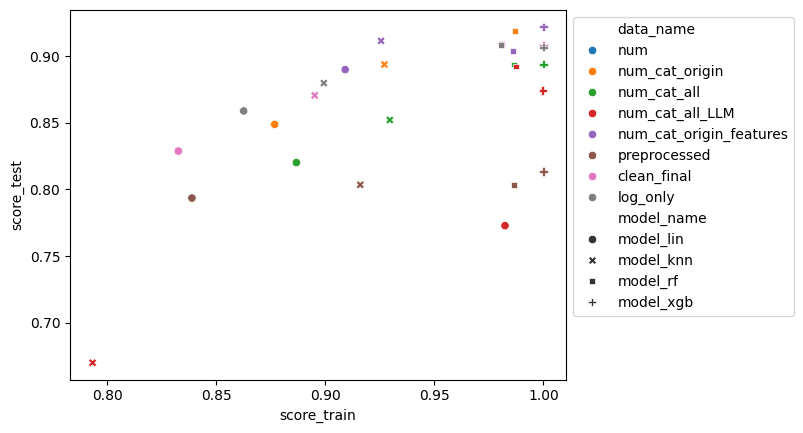

In [61]:
ax = sns.scatterplot(data=results, x='score_train', y='score_test', hue='data_name', style='model_name')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Metoda LinearRegression daje całkiem niezłe wyniki. Wyniki są mocno zależne od danych, które są przedstawiane do uczenia i testowania. Za wyjątkiem zastosowania zbioru danych ze słownikiem LLM metoda LinearRegression nie wykazuje objawów przeuczenia. Dla naszych danych może to świadczyć o bardzo dobrej jakości uczenia tej metody.

Dla wyników dla zbiorów testowych (score_test) stosując odpowiednie opracowanie zbioru wejściowego można uzyskać dokładność na poziomie znacznie bardziej zaawansowanych metod uczenia maszynowego.

Zaznaczam, że metody RandomForestRegressor oraz XGboost nie były optymalizowane, służą tylko jako punkt odniesienia. W naszym przypadku dla tych metod występuje efekt przeuczenia. Szczegółłowe analizowanie tych metopd nie jest przedmiotem tego opracowania.

W naszym przypadku zjawisko przeuczenia modelu jest określane na podstawie relacji oceny dla danych uczących i oceny dla danych testowych. Jeśli wartości ocen odbiegają od siebie, to mamy do czynienia z przeuczeniem. Takie określanie zjawiska przeuczenia modelu jest uproszczeniem, ale na potrzeby tego opracowania jest wystarczające.

## Analiza wyników dla modelu LinearRegression

## Podstawowym kryterium oceny jest wynik dla danych testowych (score_test)

In [62]:
# Ogólne wyniki dla LinearRegression()
print(results.iloc[:,:4][ results['model_name']=='model_lin'] )

                  data_name model_name score_train score_test
0                       num  model_lin    0.832622   0.828823
4            num_cat_origin  model_lin    0.876747   0.848826
8               num_cat_all  model_lin    0.886706   0.820164
12          num_cat_all_LLM  model_lin    0.982354   0.772834
16  num_cat_origin_features  model_lin    0.909077   0.889965
20             preprocessed  model_lin     0.83882   0.793555
24              clean_final  model_lin    0.832622   0.828823
28                 log_only  model_lin    0.862544   0.858936


Dla większości zbiorów wartości oceny dla danych uczących i testowych są zbliżone. Fakt ten można interpretować jako brak zjawiska przeuczenia modelu.

Wyjątkiem jest zbiór wykorzystujący słownik LLM dla kolumny names. Dla tego przypadku ocena dla zbioru testowego jest wyraźnie niższa. Prawdopodobnie występuje zjawisko przeuczenia związane z małą ilością rekordów w bazie. W tym przypadku można powiedzieć, że jest duże prawdopodobieństwo, że dane w zbiorze testowym są nieznane w kontekście zbioru słownika LLM.

In [63]:
# zbiory odniesienia
print(results.iloc[:,:4][ results['model_name']=='model_lin'][(results['data_name']=='num') | (results['data_name']=='clean_final')] )

      data_name model_name score_train score_test
0           num  model_lin    0.832622   0.828823
24  clean_final  model_lin    0.832622   0.828823


Jako zbiory odniesienia traktowane są:

* Zbiór 1 - 'num'

* Zbiór 7 - 'clean_final'

Obydwa zbiory danych wejściowych zostały uzyskane poprzez różną obróbkę statystyczną i usunięcie wartości odstających.

W tym przypadku w sensie oceny uzyskano takie same wyniki.

In [64]:
# usunięcie zmiennych odstających - poprawienie rozkładów zmiennych, zbliżenie się do rozkładów normalnych
print(results.iloc[[20, 24],:4][ results['model_name']=='model_lin'] )

       data_name model_name score_train score_test
20  preprocessed  model_lin     0.83882   0.793555
24   clean_final  model_lin    0.832622   0.828823


Ze Zbioru 6 ('preprocessed') usunięto wartości odstające metodą Q1, Q3, 1,5*IQR - uzyskano Zbiór 7 ('clean_final'). Spowodowało to przybliżenie się rozkładów do rozkładu normalnego. Efekt widać w postaci poprawy oceny dla zbioru testowego o ponad 3%.

In [65]:
# poprawienie rozkładów zmiennych, zbliżenie się do rozkładów normalnych
print(results.iloc[[24, 28],:4][ results['model_name']=='model_lin'] )

      data_name model_name score_train score_test
24  clean_final  model_lin    0.832622   0.828823
28     log_only  model_lin    0.862544   0.858936


Dla zbioru 8 ('log_only') zadrosowano transformację 3 cech poprzez logarytmowanie. Celem było zbliżenie się rozkładu cech do rozkładu normalnego. Regresja liniowa w tej postaci powinna osiągać lepsze wyniki dla danych zbliżonych do rozkładów normalnych.

Po zastosowaniu transformacji logarytmicznej wynik dla danych testowych poprawił się o 3%. Na tym poziomie jest to całkiem niezła poprawa.

In [66]:
# potraktowanie cech jako zmienne kategoryczne (dummies)
print(results.iloc[[0, 4, 8, 12],:4][ results['model_name']=='model_lin'] )

          data_name model_name score_train score_test
0               num  model_lin    0.832622   0.828823
4    num_cat_origin  model_lin    0.876747   0.848826
8       num_cat_all  model_lin    0.886706   0.820164
12  num_cat_all_LLM  model_lin    0.982354   0.772834


Potraktowanie zmiennej 'origin' (kraj pochodzenia) jako kategorycznej i ujęcie jaj jako 'dummies' polepszyło wyniki dla zbioru uczącego i testowego - Zbiór 2 ('num_cat_origin'). Interpretować to można jako dowód na to, że ta zmienna jest typu kategorycznego, nie należy jej traktować jako zmienną numeryczną.

W dalszej kolejności do zmiennych kategorycznych dodano 'cylinders' (ilość cylindrów), Zbiór 3 ('num_cat_all'). W tym przypadku uzyskano polepszenie oceny zbioru uczącego, ale pogorszenie oceny zbioru testowego. Interpretujemy to jako wskazówkę, że zmienną 'cylinders' należy traktować jako numeryczną.

Następnie podjęto próbę wykorzystania informacji tekstowej z kolumny 'names', dane Zbiór 4 ('num_cat_all_LLM'). Stworzony został słownik słów występujących w kolumnie 'names', słownik posłużył do wygenerowania następnych 240 cech, traktowanych jako kategorie (dummies). Słownik składa się z pojedyńczych słów, nie używano zlepków słownych. W tym zbiorze występują kolumny 'origin' i 'cylinders' w rozbiciu na 'dummies'. Użycie podejścia słownikowego dało znaczną poprawę dla danych uczących, ale słabszą ocenę dla danych testowych. Ten efekt interpretujemy jako wystąpienie przeuczenia. W tym ujęciu prawdopodobnie jest za mało danych, dane testowe są raczej nieznane w kontekście danych uczących. Dla naszego zbioru to podejście powoduje istotne pogorszenie oceny dla danych testoiwych.

In [67]:
# dodanie dodatkowych cech (features) ujmujących relacje pomiedzy pierwotnymi cechami w danych
print(results.iloc[[4, 16],:4][ results['model_name']=='model_lin'] )

                  data_name model_name score_train score_test
4            num_cat_origin  model_lin    0.876747   0.848826
16  num_cat_origin_features  model_lin    0.909077   0.889965


Do Zbioru 2 z kolumną 'origin' potraktowaną jako dane kategoryczne dodano dodatkowe 4 cechy (features). Uzyskano jednoczesną poprawę oceny danych uczących i danych testowych. Przy tych poziomach poprawa o 3% jest znacząca. Interpretować to można jako istnienie w danych istotnych relacji pomiędzy cechami.

Model liniowy dla danych "num_cat_origin_features" osiągnął najlepsze efekty spośród rozpatrywanych.

Szczegółoowe parametry modelu:

In [68]:
print(results.iloc[[16],:4][ results['model_name']=='model_lin'] )
print(' ')
# Parametry metody LinearRegression
print(results.iloc[16,4].get_params())

                  data_name model_name score_train score_test
16  num_cat_origin_features  model_lin    0.909077   0.889965
 
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [69]:
# współczynniki .coef_
print(results.iloc[16,4].coef_)

[ 0.08663732 -0.10941162  0.32891913  0.07196419 -0.26318667 -0.27112298
 -0.35924682]


Dla metody LinearRegression współczynniki reprezentują sposób obliczania wyniku. Jest to reprezentacja wiedzy wyekstrachowanej ze zbioru danych.

Dużą zaletą metody LinearRegression jest łatwość interpretowania wiedzy wynikającej z nauczenia się danych i intuicyjna zrozumioałość interpretacji dla człowieka.

In [70]:
#print(results.iloc[16,4].summary())

Na tym etapie ze względu na ograniczenia czasowe zakończyliśmy analizę. Głównie skupiliśmy się na pokazaniu wpływu opracowania danych na uzyskiwane wyniki uczenia maszynowego.

Mamy śwadomość, że połączenie: opracoweania danych, transformacji zbliżających do rozkładów normalnych, dodatkowych cech (features), rozdziałów na odpowiednie zbiory da w wyniku jeszcze lepsze wyniki uczenia maszynowego.

Warto zauważyć, że stosując niby prosty model regresji liniowej można osiągnąć wyniki porównywalne ze znacznie bardziej zaawansowanymi metodami uczenia maszynowego (RTF, XGBoost).

# Wyznaczenie norm opisujących dopasowanie do zbioru

Dotychczas wykorzystywaliśny do oceny uczenia metodę .score() . Przede wszystkim chodziło o możlowość porównywania wyników.

Zastosowanie innych norm może dać inne wyniki porównania. Wybór normy do porównania jest ściśle związany z oczekiwanymi efektami uczenia maszynowego.

Obliczenie innych norm:

In [71]:
# metryki (MAE, RMSE, R²)
# Walidacja krzyżowa

metrics = []
cv = KFold(n_splits=5, shuffle=True, random_state=0)

for data_idx, data in enumerate(data_names):

    df = pd.read_csv(data_file_names[data_idx])   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for model, model_name in zip(models, models_names):
        y_pred_test = model.predict(X_test)
        # neg_root_mean_squared_error => po odwróceniu będzie RMSE
        scores = cross_val_score(model, X, y, cv=cv,
                                 scoring="neg_root_mean_squared_error",
                                 n_jobs=-1)
        metrics.append({
            "data":  data,
            "model": model_name,
            "MAE":   mean_absolute_error(y_test, y_pred_test),
            "RMSE":  np.sqrt(mean_squared_error(y_test, y_pred_test)),
            "R2":    r2_score(y_test, y_pred_test),
            "CV_RMSE_mean": -scores.mean(),
            "CV_RMSE_std":  scores.std()
        })

metrics_df = pd.DataFrame(metrics)
metrics_df

,data,model,MAE,RMSE,R2,CV_RMSE_mean,CV_RMSE_std
0,num,model_lin,0.275193,0.404331,0.858936,0.374328,0.022711
1,num,model_knn,0.252217,0.373203,0.879820,0.367994,0.032345
2,num,model_rf,0.218437,0.325472,0.908595,0.341066,0.032741
3,num,model_xgb,0.220811,0.328748,0.906746,0.368299,0.041336
4,num_cat_origin,model_lin,0.275193,0.404331,0.858936,0.374328,0.022711
5,num_cat_origin,model_knn,0.252217,0.373203,0.879820,0.367994,0.032345
6,num_cat_origin,model_rf,0.218437,0.325472,0.908595,0.341066,0.032741
7,num_cat_origin,model_xgb,0.220811,0.328748,0.906746,0.368299,0.041336
8,num_cat_all,model_lin,0.275193,0.404331,0.858936,0.374328,0.022711
9,num_cat_all,model_knn,0.252217,0.373203,0.879820,0.367994,0.032345
